In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
df = pd.read_csv("NFLX.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [8]:
sns.set(rc={'figure.figsize' :(10,5)})

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Text(0.5, 1.0, 'Volume of stock versus time')

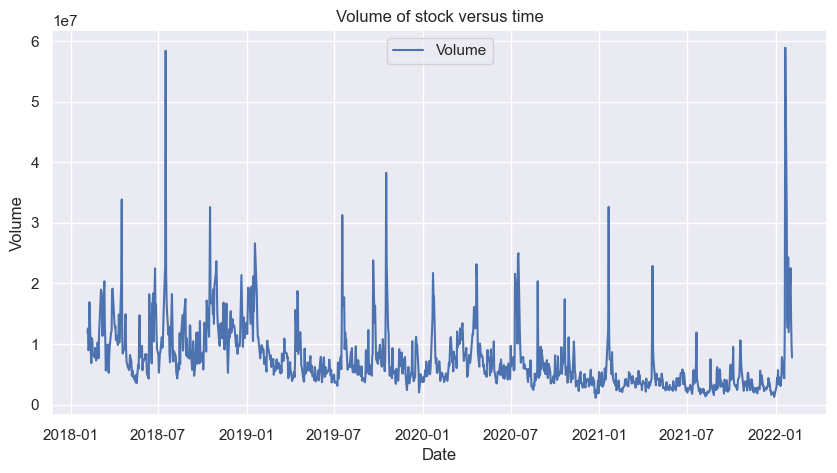

In [16]:
sns.lineplot(x=df.index, y=df['Volume'],label='Volume')
plt.title('Volume of stock versus time')

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='Date'>

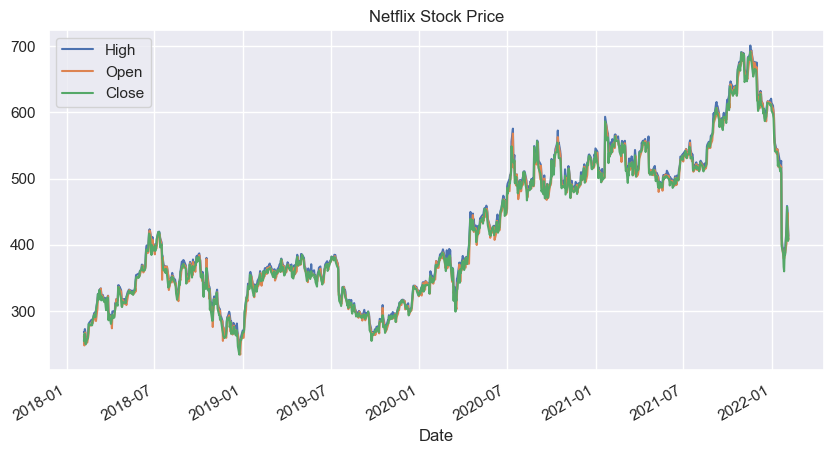

In [18]:
df.plot(y=['High','Open','Close'], title = 'Netflix Stock Price')

<Axes: xlabel='Year'>

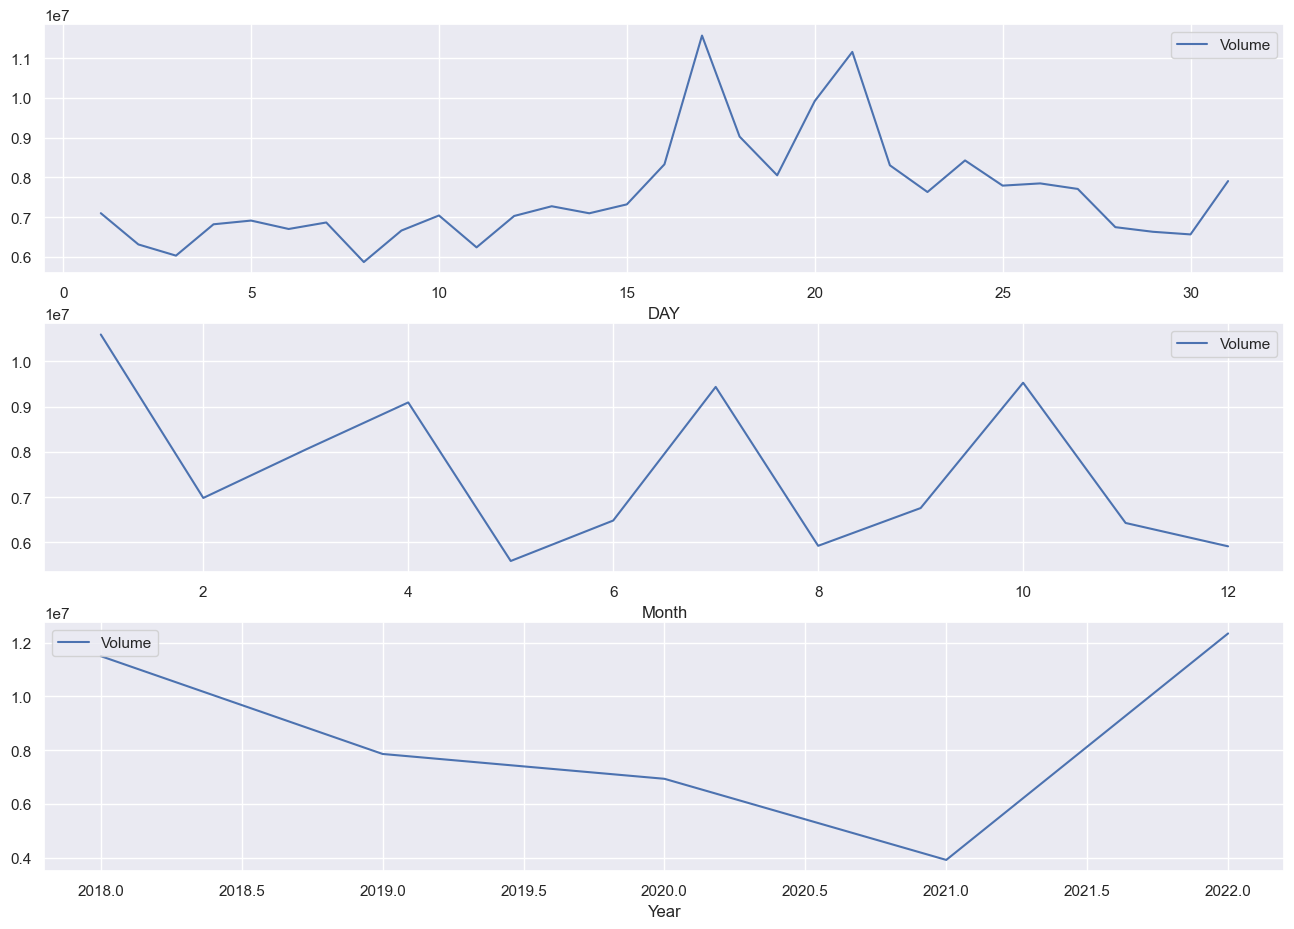

In [22]:
fig,(ax1,ax2,ax3) = plt.subplots(3, figsize=(16,11))
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax1,xlabel='DAY')
df.groupby(df.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume',ax=ax3,xlabel='Year')

# TOP 5 DATES WITH HIGHEST STOCK PRICE

In [23]:
df = df.sort_values(by = 'High', ascending = False).head(5)
df['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

# TO 5 DATES WITH LOWEST STOCK PRICE

In [24]:
df = df.sort_values(by = 'Low', ascending = True).head(5)
df['Low']

Date
2021-10-29    671.239990
2021-11-19    675.000000
2021-11-01    676.539978
2021-11-18    679.739990
2021-11-17    686.090027
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

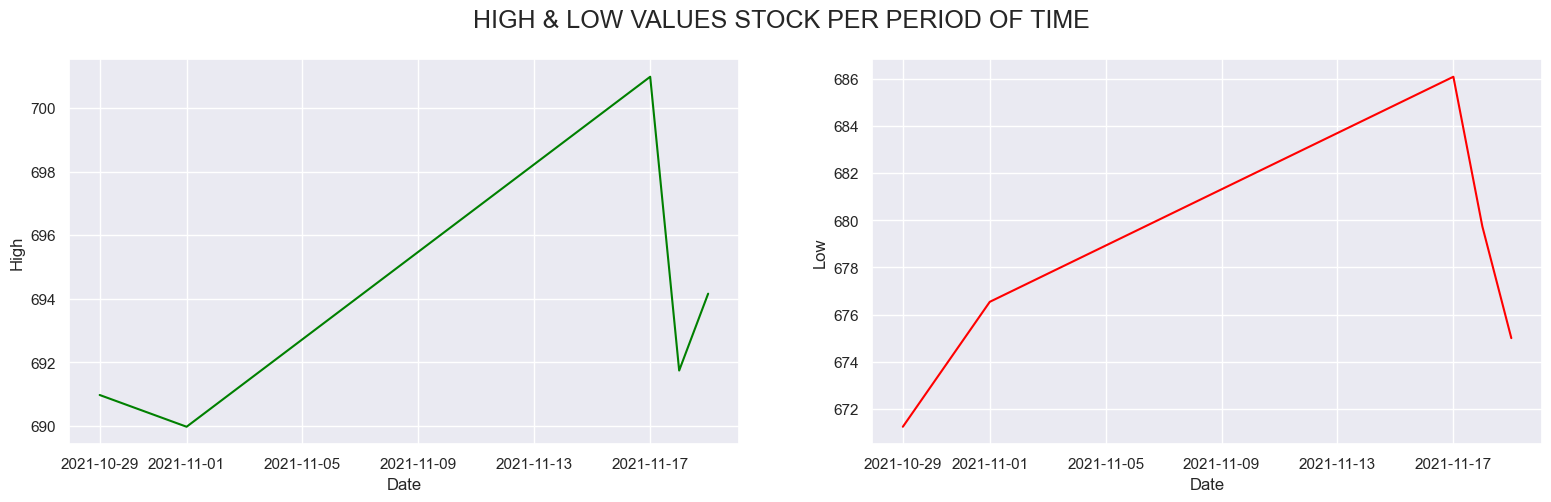

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=2,sharex=True,figsize = (19,5))
plt.suptitle("HIGH & LOW VALUES STOCK PER PERIOD OF TIME",fontsize=18)
sns.lineplot(ax = axes[0],y = df['High'], x=df.index, color='green')
sns.lineplot(ax = axes[1],y = df['Low'], x=df.index, color='red')